In [1]:
# Не забудьте про import для кода ниже!
import matplotlib.pyplot as plt
import numpy as np

# Что читать
* [Примеры графиков](https://matplotlib.org/tutorials/introductory/sample_plots.html)
* [Много примеров](https://matplotlib.org/3.1.1/gallery/index.html) - официальная галерея примеров

* [Tutorial](https://github.com/rougier/matplotlib-tutorial) by N.Rougier


# Разные типы графиков

* [plot](https://pyprog.pro/mpl/mpl_plot.html) - график линии
* [scatter](https://pyprog.pro/mpl/mpl_scatter.html) - точки
* [bar](https://pyprog.pro/mpl/mpl_bar.html) - прямоугольники
* [stackplot](https://pyprog.pro/mpl/mpl_stackplot.html) - надставленные области
* [quiver](https://pyprog.pro/mpl/mpl_quiver.html) - поле векторов
* [streamplot](https://pyprog.pro/mpl/mpl_streamplot.html) - поток векторов

## На графиках можно

* [fill](https://pyprog.pro/mpl/mpl_fill.html) - закрасить область под или внутри 1 линии
* [fill_between](https://pyprog.pro/mpl/mpl_fill_between.html) - закрашенная область между линиями
* [imshow](https://pyprog.pro/mpl/mpl_imshow.html) - картинки
* [contour](https://pyprog.pro/mpl/mpl_contour.html) - линии уровней
* [pcolormesh](https://pyprog.pro/mpl/mpl_pcolormesh.html) - псевдоцветная сетка
* [arrow](https://pyprog.pro/mpl/mpl_arrow.html) - стрелка

# Несколько осей

Мы умеем рисовать несколько графиков на 1 рисунке в общих осях.

Научимся рисовать несколько графиков рядом в разных осях. Например, так:

![Разные графики](http://acm.mipt.ru/twiki/pub/Cintro/PythonGraphs/2.png)

## Рисунок figure

Есть figure (весь рисунок) и есть subplots и axes (оси), в которых мы будем рисовать разные графики.

![figure, subplots, axes](https://pyprog.pro/mpl/image/part_0/mpl_anatomy.jpg)

* `fig = plt.figure()` - доступ к свойствам всего рисунка. 

Если вызвать функцию с параметрами, можно установить размер рисунка (figsize в inch), цвет фона и так далее.

* **fig.savefig('my_plot.png')** 

## Доступ к осям

### 1 график на рисунке `plt.plot(x,y)`

Раньше мы рисовали 1 график на рисунке и обращались к функции plot для всего пакета. 

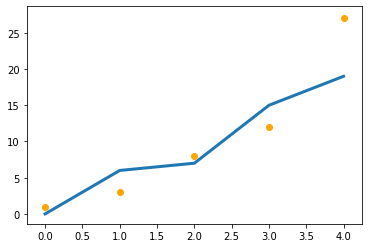

In [2]:
plt.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19], linewidth = 3)
plt.scatter([0, 1, 2, 3, 4], [1, 3, 8, 12, 27], color = 'orange')

plt.show()

### К figure добавляем оси через `add_subplot`

**fig.add_subplot(row_number, col_number, index)**

**В названии функции НЕТ буквы s в КОНЦЕ!!!**

<Figure size 432x288 with 0 Axes>

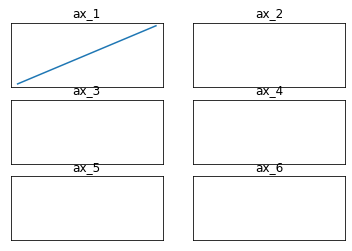

In [4]:
fig = plt.figure()  # получаем figure

# получаем фигуру
fig = plt.figure()

# к фигуре добавляем оси
ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 2)
ax_3 = fig.add_subplot(3, 2, 3)
ax_4 = fig.add_subplot(3, 2, 4)
ax_5 = fig.add_subplot(3, 2, 5)
ax_6 = fig.add_subplot(3, 2, 6)

# в каждой оси можно нарисовать свой график с названием
ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_1.plot([1, 2, 3], [10, 20, 30])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])
ax_5.set(title = 'ax_5', xticks=[], yticks=[])
ax_6.set(title = 'ax_6', xticks=[], yticks=[])

plt.show()

### получаем figure и матрицу axis через `plt.subplots()`

Если 1 область, то получаем сразу figure и axis:

`fig, ax = plt.subplots()` - **так можно писать во всех примерах предыдущего урока**.

Если много областей, то пишем так:

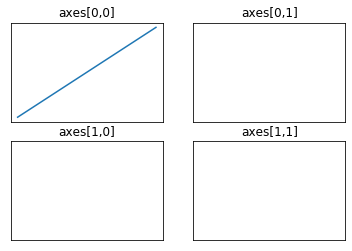

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols =2 )

axes[0,0].set(title='axes[0,0]')
axes[0,0].plot([1, 2, 3], [10, 20, 30])
axes[0,1].set(title='axes[0,1]')
axes[1,0].set(title='axes[1,0]')
axes[1,1].set(title='axes[1,1]')

for ax in axes.flat:
    # удаляем ticks у ВСЕХ осей всех графиков
    ax.set(xticks=[], yticks=[])  
    
plt.show()

### `plt.GridSpec` для сложных случаев

Иногда нужно нарисовать сложный график. Тогда удобнее использовать `plt.GridSpec`

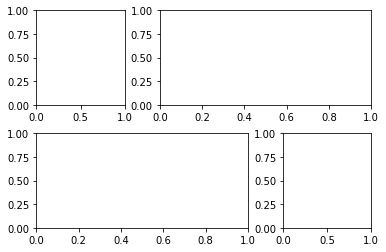

In [9]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

Пример сложного расположения графиков:

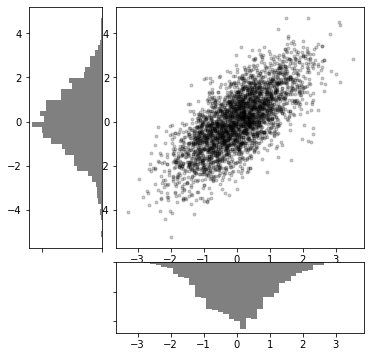

In [10]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

# Разные масштабы осей на одном графике (twinx)

На одном графике хотим построить графики зависимости разных величин от одной. 

Например, объема сферы и ее площади в зависимости от радиуса, объем в м^3, а площадь в м^2 и значения очень разные.

Или величина одна, количество новых случаев заражения Covid-19, но мы сравниваем Россию и Мьянму. В обоих случаях - это количество людей, но если строить в едином масштабе, то график для Мьянмы будет почти не виден.

В этом случае делают **левую и правую ось Y с разными значениями**.

`ax2 = ax1.twinx()`

Нарисуем график зависимости площади поверхности сферы (синий) и ее объема (красный) в зависимости от радиуса сферы:

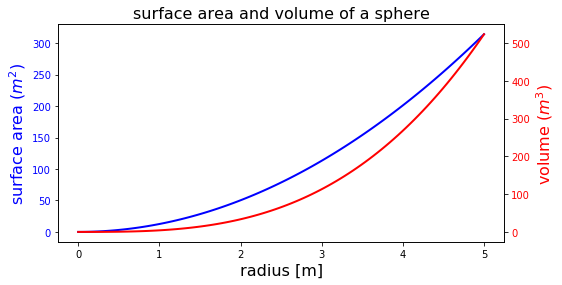

In [8]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 5, 100)
a = 4 * np.pi * r ** 2 # area
v = (4 * np.pi / 3) * r ** 3 # volume

ax1.set_title("surface area and volume of a sphere", fontsize=16)
ax1.set_xlabel("radius [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"surface area ($m^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
  label.set_color("blue")

ax2 = ax1.twinx()   # Создаем другую ось для той же области
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"volume ($m^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
  label.set_color("red")

# Свойства осей

Иногда для оси и для `plt` нужно использовать разные функции для изменения одного и того же свойства.

## plot - цвета, линии, форма маркера

* [Краткий справочник](https://github.com/rougier/matplotlib-tutorial#quick-references)

`ax.plot(x, y, color='b', linewidth=3, linestyle='--', marker='v')`

![line style](http://acm.mipt.ru/twiki/pub/Cintro/PythonGraphs/line_styles_reference.png)

![](http://acm.mipt.ru/twiki/pub/Cintro/PythonGraphs/marker_reference_00.png)

![](http://acm.mipt.ru/twiki/pub/Cintro/PythonGraphs/marker_reference_01.png)

![](http://acm.mipt.ru/twiki/pub/Cintro/PythonGraphs/named_colors.png)

## Legend - описание графиков

`ax.legend(loc=n)`, где `n` - где расположено описание на графике (1, 2, 3, 4)

![](http://acm.mipt.ru/twiki/pub/Cintro/PythonGraphs/legend_loc.png)


`ax.legend(ncol=4, loc=3, bbox_to_anchor=(0, 1))`

![](http://acm.mipt.ru/twiki/pub/Cintro/PythonGraphs/legend_out.png)

## Axis labels and titles - надписи у осей и заголовок

```
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title("axis labels and title example")
```
Можно указать дополнительные параметры (размер, цвет, отсутп и так далее)
```
ax.set_xlabel("x", labelpad=5, fontsize=18, color="blue")
ax.set_ylabel("f(x)", labelpad=15, fontsize=18, color="blue")
ax.set_title("axis labels and title example", fontsize=16, color="blue")
```

## Axis range (диапазоны осей)

```
ax.set_xlim(-5, 35)
ax.set_ylim(-1, 1)
ax.axis('tight')
ax.axis('equal')
```
![](http://acm.mipt.ru/twiki/pub/Cintro/PythonGraphs/axis_property.png)

## Axis ticks, tick labels

Линии на осях и подписи у линий.

![](http://acm.mipt.ru/twiki/pub/Cintro/PythonGraphs/ticks_terms.png)

* **ax.set_xticks** - через оси
* **plt.xticks** - через `plt`

Через plt:
```
plt.xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi], ['$-2\pi$', '$-\pi$', 0, r'$\pi$', r'$2\pi$'])
```

Через оси:

```
# ax0 with default ticks
ax1.set_xticks([-5, 0, 5])
ax1.set_yticks([-1, 0, 1])

ax2.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax2.yaxis.set_major_locator(mpl.ticker.FixedLocator([-1, 0, 1]))
ax2.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
ax2.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))

ax3.set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
ax3.set_xticklabels(['$-2\pi$', '$-\pi$', 0, r'$\pi$', r'$2\pi$'])
```
![](http://acm.mipt.ru/twiki/pub/Cintro/PythonGraphs/ticks.png)

## Grid (решетка)

```
axes[0].set_title("default grid")
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color="blue", which="both", linestyle=':', linewidth=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
axes[2].grid(color="grey", which="minor", axis='x', linestyle=':', linewidth=0.25)
axes[2].grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)
```
![](http://acm.mipt.ru/twiki/pub/Cintro/PythonGraphs/grid.png)

## Логарифмическая шкала

Для всего рисунка:
```
plt.xscale('log')
plt.yscale('log')
```
Для одной оси (другие оси на рисунке могут иметь другой тип шкалы).
```
ax.set_xscale('log')
ax.set_yscale('log')
```